In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('cities_r2.csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name_of_city                    493 non-null    object 
 1   state_code                      493 non-null    int64  
 2   state_name                      493 non-null    object 
 3   dist_code                       493 non-null    int64  
 4   population_total                493 non-null    int64  
 5   population_male                 493 non-null    int64  
 6   population_female               493 non-null    int64  
 7   0-6_population_total            493 non-null    int64  
 8   0-6_population_male             493 non-null    int64  
 9   0-6_population_female           493 non-null    int64  
 10  literates_total                 493 non-null    int64  
 11  literates_male                  493 non-null    int64  
 12  literates_female                493 

In [26]:
data=df.iloc[:,[15,4]].values

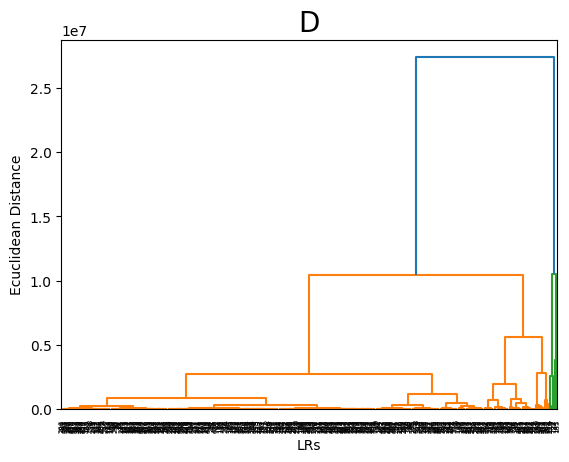

In [27]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward'))
plt.title('D', fontsize = 20)
plt.xlabel('LRs')
plt.ylabel('Ecuclidean Distance')
plt.show()

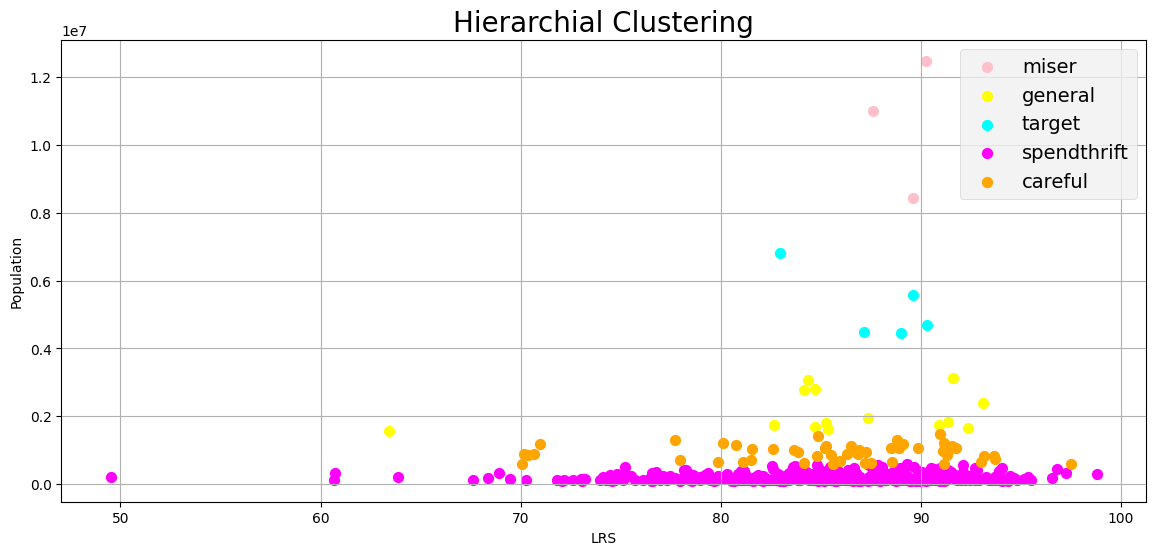

In [30]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_hc=hc.fit_predict(data)

fig,ax = plt.subplots(figsize=(14,6))
plt.scatter(data[y_hc == 0, 0], data[y_hc == 0, 1], s = 50, c = 'pink', label = 'miser')
plt.scatter(data[y_hc == 1, 0], data[y_hc == 1, 1], s = 50, c = 'yellow', label = 'general')
plt.scatter(data[y_hc == 2, 0], data[y_hc == 2, 1], s = 50, c = 'cyan', label = 'target')
plt.scatter(data[y_hc == 3, 0], data[y_hc == 3, 1], s = 50, c = 'magenta', label = 'spendthrift')
plt.scatter(data[y_hc == 4, 0], data[y_hc == 4, 1], s = 50, c = 'orange', label = 'careful')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('LRS')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.show()